In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
data = pd.read_csv(r"C:\Users\erena\Downloads\turkey-car-market-2020\turkey_car_market.csv")

In [24]:
# Gruplama işlemi
grouped_data = data.groupby(['Marka', 'Arac Tip Grubu', 'Model Yıl', 'Vites']).size().reset_index(name='Araç Sayısı')

# En çok yer alan 5 araç
most_common = grouped_data.nlargest(5, 'Araç Sayısı')

# En az yer alan 5 araç
least_common = grouped_data.nsmallest(5, 'Araç Sayısı')

# Sonuçları görüntüleyelim
print("En çok yer alan 5 araç:")
print(most_common)

print("\nEn az yer alan 5 araç:")
print(least_common)

En çok yer alan 5 araç:
        Marka Arac Tip Grubu  Model Yıl                Vites  Araç Sayısı
2280  Renault         Megane     2017.0  Yarı Otomatik Vites          207
2351  Renault         Symbol     2017.0            Düz Vites          198
522     Dacia         Dokker     2015.0            Düz Vites          121
2184  Renault           Clio     2017.0            Düz Vites          109
2199  Renault        Fluence     2011.0            Düz Vites          107

En az yer alan 5 araç:
   Marka Arac Tip Grubu  Model Yıl      Vites  Araç Sayısı
0  Acura             CL     1994.0  Düz Vites            1
1  Acura             CL     1999.0  Düz Vites            1
2  Acura             CL     2001.0  Düz Vites            1
4  Acura             CL     2008.0  Düz Vites            1
6  Acura             CL     2010.0  Düz Vites            1


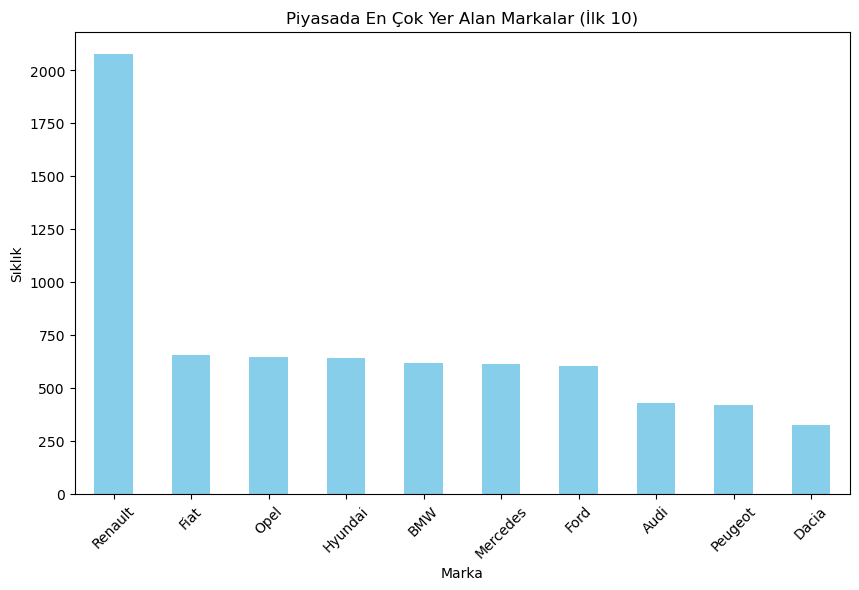

In [30]:
# Markalara göre gruplama ve sıklık hesaplama
top_brands = data['Marka'].value_counts().head(10)  # En çok görülen ilk 10 markayı seçiyoruz

# Görselleştirme
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='skyblue')
plt.title("Piyasada En Çok Yer Alan Markalar (İlk 10)")
plt.xlabel("Marka")
plt.ylabel("Sıklık")
plt.xticks(rotation=45)
plt.show()

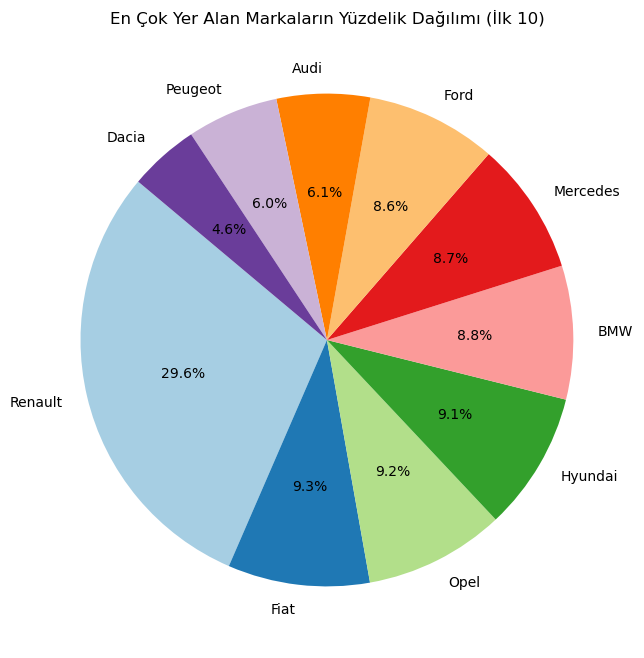

In [42]:
# En çok yer alan 10 modeli yüzdelik dilimde hesaplama
top_models = data['Marka'].value_counts(normalize=True).head(10) * 100  # Yüzdelik dilime çevirdik

# Pasta grafiği ile görselleştirme
plt.figure(figsize=(8, 8))
top_models.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("En Çok Yer Alan Markaların Yüzdelik Dağılımı (İlk 10)")
plt.ylabel("")  # Y eksenini kaldırmak için boş bırakıyoruz
plt.show()

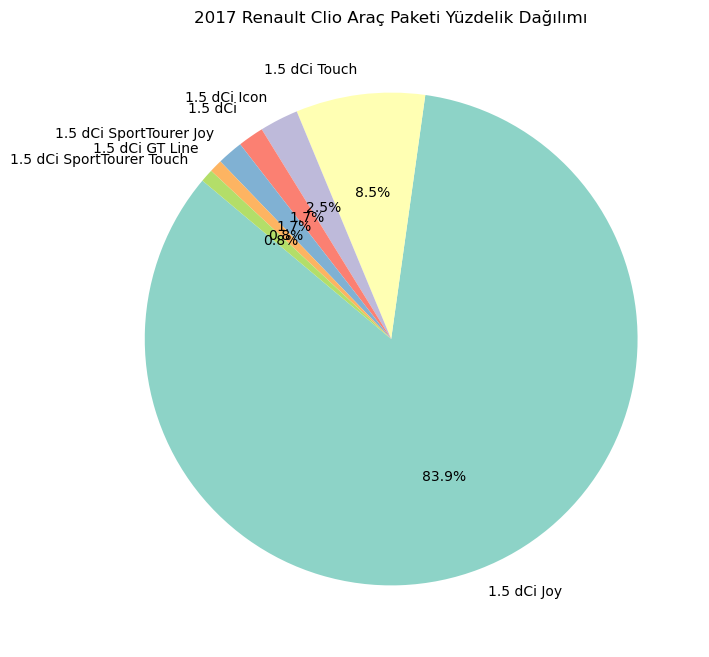

In [52]:
# 2018 model Fiat Egea araçlarını filtreleme
fiat_egea_2018 = data[(data['Marka'] == 'Renault') & 
                      (data['Arac Tip Grubu'] == 'Clio') & 
                      (data['Model Yıl'] == 2017)]

# Araç tipine göre yüzdelik hesaplama
body_types = fiat_egea_2018['Arac Tip'].value_counts(normalize=True) * 100

# Pasta grafiği ile görselleştirme
plt.figure(figsize=(8, 8))
body_types.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("2017 Renault Clio Araç Paketi Yüzdelik Dağılımı")
plt.ylabel("")  # Y eksenini kaldırmak için boş bırakıyoruz
plt.show()

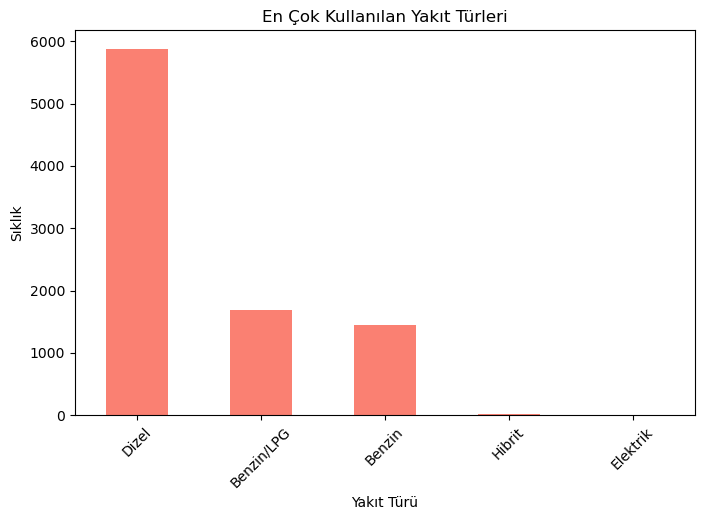

In [32]:
# Yakıt türüne göre gruplama ve sıklık hesaplama
fuel_types = data['Yakıt Turu'].value_counts()  # Yakıt türlerini ve sıklıklarını alıyoruz

# Görselleştirme
plt.figure(figsize=(8, 5))
fuel_types.plot(kind='bar', color='salmon')
plt.title("En Çok Kullanılan Yakıt Türleri")
plt.xlabel("Yakıt Türü")
plt.ylabel("Sıklık")
plt.xticks(rotation=45)
plt.show()